### Analyse des Articles

[BSARD Dataset] (https://huggingface.co/datasets/maastrichtlawtech/bsard) (Open Source).

Dataset d'articles juridiques de la loi Belge

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df_articles = pd.read_csv("articles.csv")
df_articles.head()

,id,reference,article,law_type,code,book,part,act,chapter,section,subsection,description
0,1,"Art. 1.1.1, Code Bruxellois de l'Air, du Clima...",Le présent Code règle une matière visée à l'ar...,regional,"Code Bruxellois de l'Air, du Climat et de la M...",Dispositions communes,NaN,Généralités,NaN,NaN,NaN,"Dispositions communes, Généralités"
1,2,"Art. 1.1.2, Code Bruxellois de l'Air, du Clima...",Le présent Code transpose en Région de Bruxell...,regional,"Code Bruxellois de l'Air, du Climat et de la M...",Dispositions communes,NaN,Généralités,NaN,NaN,NaN,"Dispositions communes, Généralités"
2,3,"Art. 1.2.1, Code Bruxellois de l'Air, du Clima...",Le présent Code poursuit les objectifs suivant...,regional,"Code Bruxellois de l'Air, du Climat et de la M...",Dispositions communes,NaN,Objectifs,NaN,NaN,NaN,"Dispositions communes, Objectifs"
3,4,"Art. 1.3.1, Code Bruxellois de l'Air, du Clima...","Au sens du présent Code, il faut entendre par ...",regional,"Code Bruxellois de l'Air, du Climat et de la M...",Dispositions communes,NaN,Définitions,NaN,NaN,NaN,"Dispositions communes, Définitions"
4,5,"Art. 1.4.1, Code Bruxellois de l'Air, du Clima...","Le plan régional Air-Climat-énergie, ci-après ...",regional,"Code Bruxellois de l'Air, du Climat et de la M...",Dispositions communes,NaN,Plan régional air-climat-énergie,Contenu et portée du plan,NaN,NaN,"Dispositions communes, Plan régional air-clima..."


In [7]:
df_articles['reference'][22225] 

'Art. X.5-2, Code du Bien-être au Travail (Livre X, Titre 5)'

In [5]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22633 entries, 0 to 22632
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           22633 non-null  int64 
 1   reference    22633 non-null  object
 2   article      22633 non-null  object
 3   law_type     22633 non-null  object
 4   code         22633 non-null  object
 5   book         16993 non-null  object
 6   part         1360 non-null   object
 7   act          20273 non-null  object
 8   chapter      20272 non-null  object
 9   section      13151 non-null  object
 10  subsection   5005 non-null   object
 11  description  22618 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


In [3]:
df_articles['code'].value_counts()

code
Code Réglementaire Wallon de l'Action sociale et de la Santé                 2618
Code Judiciaire                                                              2285
Code de Droit Economique                                                     2032
Code Civil                                                                   1961
Code du Bien-être au Travail                                                 1287
Code des Sociétés et des Associations                                        1194
Code de la Démocratie Locale et de la Décentralisation                       1159
Code Wallon de l'Action sociale et de la Santé                               1032
Code de la Navigation                                                         977
Code de l'Eau intégré au Code Wallon de l'Environnement                       902
Code Wallon du Développement Territorial                                      796
Code d'Instruction Criminelle                                                 719
Code Pénal 

In [5]:
# count the number of unique code: 
df_articles['code'].nunique()

34

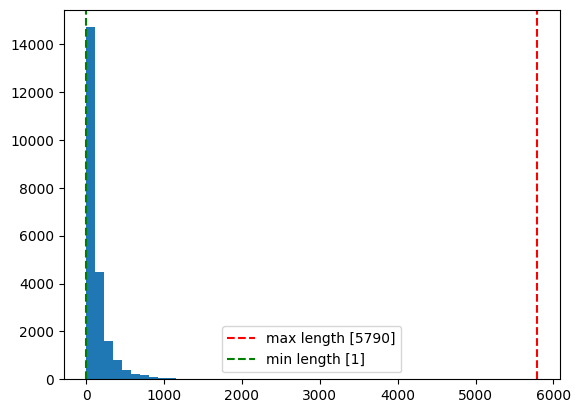

5790
1


In [17]:
# display the histogram of length in the column 'article'
len_articles = [len(article.split()) for article in df_articles['article']]

plt.hist(len_articles, bins=50)

# display max and min length in dash lines
max_len = max(len_articles)
min_len = min(len_articles)

plt.axvline(max_len, color='red', linestyle='--', label=f'max length [{max_len}]')
plt.axvline(min_len, color='green', linestyle='--', label=f'min length [{min_len}]')

plt.legend()
plt.show()


In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("almanach/camembert-base")

In [34]:
len_articles_tokens_ = [len(tokenizer(article)['input_ids']) for article in df_articles['article']]


In [36]:
len(len_articles_tokens_)

22633

In [40]:
# remove the max and min length
sorted_len_articles_tokens = sorted(len_articles_tokens_)
len_articles_tokens = sorted_len_articles_tokens[22600:]

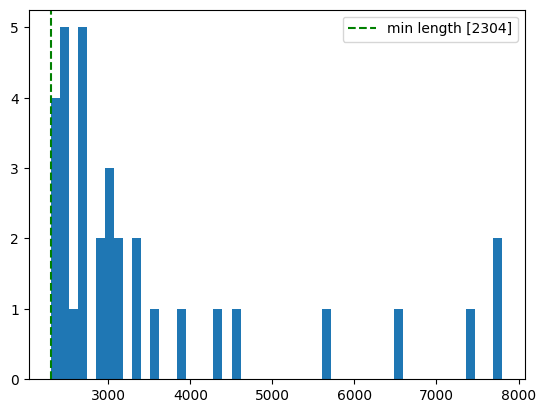

In [42]:
plt.hist(len_articles_tokens, bins=50)

# display max and min length in dash lines
max_len = max(len_articles_tokens)
min_len = min(len_articles_tokens)

# plt.axvline(max_len, color='red', linestyle='--', label=f'max length [{max_len}]')
plt.axvline(min_len, color='green', linestyle='--', label=f'min length [{min_len}]')

plt.legend()
plt.show()

In [48]:
print(df_articles['article'].iloc[25])

print(len(df_articles['article'].iloc[25].split()))

§ 1er. Les unités PEB neuves et rénovées peuvent faire l'objet d'une dérogation préalable totale ou partielle aux exigences PEB lorsque le respect partiel ou total de ces exigences est techniquement, fonctionnellement ou économiquement irréalisable.§ 2. Les requêtes de dérogation visées au § 1er sont introduites auprès de l'autorité à qui est adressée la notification du début des travaux visée à l'article 2.2.8, préalablement à l'introduction de la notification du début des travaux.Le Gouvernement fixe la procédure d'instruction des requêtes de dérogation et détermine les critères et les seuils d'octroi de ces dérogations.Les dérogations sont accordées par Bruxelles Environnementou l'autorité délivrante du permis. Elles peuvent faire l'objet d'un recours auprès du Collège d'environnement sauf si l'autorité délivrante est le Gouvernement. Les modalités de ce recours sont déterminées par le Gouvernement.§ 3. L'octroi d'une dérogation à une exigence PEB ne dispense pas des autres obligati

: 

---------------

### Questions Dataset

In [6]:
df_questions = pd.read_csv("questions_train.csv")

df_questions.head()

,id,category,subcategory,question,extra_description,article_ids
0,1102,Travail,Travail et parentalité,Je suis travailleur salarié(e). Puis-je refuse...,Pendant la grossesse,"22225,22226,22227,22228,22229,22230,22231,2223..."
1,91,Argent,Dettes,Peut-on saisir tous mes revenus ?,"Procédures de récupération des dettes, Récupér...","5853,5854,5855"
2,474,Famille,Situation de couples,Je suis marié(e). Nous sommes mariés. Dois-je ...,Mariage,"1096,1097,1098,1108,1109,1110"
3,836,Logement,Location en Wallonie,Je mets un kot en location (bail de droit comm...,"Mettre un logement en location (Wallonie), Doi...","12012,12030,12031,12032,12033,12034,12035"
4,1079,Travail,Maladie - incapacité de travail,Suis-je payé pendant la procédure du trajet de...,Rupture du contrat de travail pour force majeu...,"21114,21115,21116,21117,21118,21119,21120,2112..."


In [9]:
df_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 886 non-null    int64 
 1   category           886 non-null    object
 2   subcategory        886 non-null    object
 3   question           886 non-null    object
 4   extra_description  791 non-null    object
 5   article_ids        886 non-null    object
dtypes: int64(1), object(5)
memory usage: 41.7+ KB


In [7]:
df_questions['category'].value_counts()

category
Famille               272
Logement              238
Argent                141
Justice               121
Etrangers              50
Protection sociale     35
Travail                29
Name: count, dtype: int64

In [8]:
print(df_questions["question"][0])
print(df_questions['article_ids'][0])

Je suis travailleur salarié(e). Puis-je refuser de faire des heures supplémentaires ou de travailler de nuit ?
22225,22226,22227,22228,22229,22230,22231,22232,22233,22234
